In [38]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

## Census Data ##

- SEX column: 0 is All (Male + Female), 1 is Male, 2 is Female
- AGE column: Ages from 0 to 100. 999 has a special meaning. It is sum of all ages  
- POPESTIMATE20XX : Population estimate in year 20XX

We are interested in the population changes from 2010 to 2014. 

In [40]:
full = pd.read_csv('nc-est2014-agesex-res.csv')
full.head(10)

,SEX,AGE,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014
0,0,0,3944153,3944160,3951330,3963071,3926665,3945610,3948350
1,0,1,3978070,3978090,3957888,3966510,3978006,3943077,3962123
2,0,2,4096929,4096939,4090862,3971573,3979952,3992690,3957772
3,0,3,4119040,4119051,4111920,4102501,3983049,3992425,4005190
4,0,4,4063170,4063186,4077552,4122303,4112638,3994047,4003448
5,0,5,4056858,4056872,4064653,4087713,4132210,4123408,4004858
6,0,6,4066381,4066412,4073013,4074979,4097780,4143094,4134352
7,0,7,4030579,4030594,4043047,4083240,4084964,4108615,4154000
8,0,8,4046486,4046497,4025604,4053206,4093213,4095827,4119524
9,0,9,4148353,4148369,4125415,4035769,4063193,4104133,4106832


In [41]:
partial = full[['SEX', 'AGE', 'POPESTIMATE2010', 'POPESTIMATE2014']]   # Select the columns we will focus on
partial

,SEX,AGE,POPESTIMATE2010,POPESTIMATE2014
0,0,0,3951330,3948350
1,0,1,3957888,3962123
2,0,2,4090862,3957772
3,0,3,4111920,4005190
4,0,4,4077552,4003448
...,...,...,...,...
301,2,97,54118,63252
302,2,98,37533,46536
303,2,99,26074,32791
304,2,100,45058,58468


In [42]:
simple = partial.rename(columns={'POPESTIMATE2010':'2010', 'POPESTIMATE2014': '2014'})#rename columns
simple

,SEX,AGE,2010,2014
0,0,0,3951330,3948350
1,0,1,3957888,3962123
2,0,2,4090862,3957772
3,0,3,4111920,4005190
4,0,4,4077552,4003448
...,...,...,...,...
301,2,97,54118,63252
302,2,98,37533,46536
303,2,99,26074,32791
304,2,100,45058,58468


In [44]:
simple.sort_values(by='AGE', ascending=False).head(20)

,SEX,AGE,2010,2014
305,2,999,157257573,161920569
101,0,999,309347057,318857056
203,1,999,152089484,156936487
304,2,100,45058,58468
100,0,100,54409,72197
202,1,100,9351,13729
201,1,99,6104,9037
303,2,99,26074,32791
99,0,99,32178,41828
302,2,98,37533,46536


#### Overall Proportions of Males and Females at 2014:

In [47]:
us_pop_2014 = simple.drop('2010', axis=1)
all_ages = us_pop_2014[us_pop_2014['AGE']==999]      #Select the total population data 
all_ages

,SEX,AGE,2014
101,0,999,318857056
203,1,999,156936487
305,2,999,161920569


In [48]:
us_pop_2014['AGE']==999

0      False
1      False
2      False
3      False
4      False
       ...  
301    False
302    False
303    False
304    False
305     True
Name: AGE, Length: 306, dtype: bool

In [51]:
#Calculate proportion of male and female in total population
pop_2014 = all_ages['2014'].iloc[0]
all_ages['Proportion'] = all_ages['2014']/pop_2014


In [50]:
all_ages['2014']

101    318857056
203    156936487
305    161920569
Name: 2014, dtype: int64

In [52]:
all_ages

,SEX,AGE,2014,Proportion
101,0,999,318857056,1.000000
203,1,999,156936487,0.492184
305,2,999,161920569,0.507816


Overall, there are more females than males

#### Proportions of Boys and Girls among Infants

In [53]:
infants = us_pop_2014[us_pop_2014['AGE']== 0 ]   #Select the  population data for infants:  Age=0
infants

,SEX,AGE,2014
0,0,0,3948350
102,1,0,2017857
204,2,0,1930493


In [54]:
#Calculate proportion of boys and first at birth
infants_2014 = infants['2014'].iloc[0]
infants['Proportion']= infants['2014']/infants_2014
infants

,SEX,AGE,2014,Proportion
0,0,0,3948350,1.000000
102,1,0,2017857,0.511063
204,2,0,1930493,0.488937


Among newborns however,  there are more males than females. In fact, it has long been observed that the proportion of boys among newborns is slightly more than 1/2.

#### Female/Male  Ratio at Each Age :

In [55]:
no_999 = simple[simple['AGE']!= 999]  # remove rows where AGE is 999

In [56]:
everyone = no_999[no_999['SEX'] == 0].drop('SEX', axis=1) # population data for all
males = no_999[no_999['SEX'] == 1].drop('SEX', axis=1)# population data for male
females = no_999[no_999['SEX'] == 2].drop('SEX', axis=1) # population data for female

In [57]:
everyone

,AGE,2010,2014
0,0,3951330,3948350
1,1,3957888,3962123
2,2,4090862,3957772
3,3,4111920,4005190
4,4,4077552,4003448
...,...,...,...
96,96,97161,121184
97,97,68893,83731
98,98,47037,60185
99,99,32178,41828


In [58]:
males

,AGE,2010,2014
102,0,2018420,2017857
103,1,2020332,2023253
104,2,2088685,2022502
105,3,2101272,2048618
106,4,2084312,2043498
...,...,...,...
198,96,22022,31235
199,97,14775,20479
200,98,9504,13649
201,99,6104,9037


In [59]:
females

,AGE,2010,2014
204,0,1932910,1930493
205,1,1937556,1938870
206,2,2002177,1935270
207,3,2010648,1956572
208,4,1993240,1959950
...,...,...,...
300,96,75139,89949
301,97,54118,63252
302,98,37533,46536
303,99,26074,32791


In [61]:
females.sort_values(by='2014', ascending=False)

,AGE,2010,2014
258,54,2196798,2331961
257,53,2268457,2316131
228,24,2082209,2301237
227,23,2066126,2298701
255,51,2289164,2283261
...,...,...,...
300,96,75139,89949
301,97,54118,63252
304,100,45058,58468
302,98,37533,46536


In [62]:
males.sort_values(by='2014', ascending=False)

,AGE,2010,2014
125,23,2151095,2399883
126,24,2161380,2391398
124,22,2188228,2367842
123,21,2241095,2310734
127,25,2177171,2295836
...,...,...,...
198,96,22022,31235
199,97,14775,20479
202,100,9351,13729
200,98,9504,13649


In [63]:
# Create a table that has 2014 male and female population for each age 
pop_2014 = pd.DataFrame({'Age': males['AGE'].values,
    'Males': males['2014'].values,
    'Females': females['2014'].values})
    

In [64]:
pop_2014

,Age,Males,Females
0,0,2017857,1930493
1,1,2023253,1938870
2,2,2022502,1935270
3,3,2048618,1956572
4,4,2043498,1959950
...,...,...,...
96,96,31235,89949
97,97,20479,63252
98,98,13649,46536
99,99,9037,32791


<AxesSubplot:xlabel='Age'>

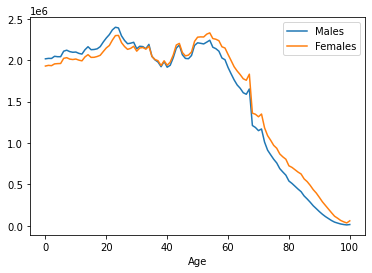

In [65]:
pop_2014.plot('Age')

In [66]:
# Calculate the percentage of females for each age and add as a new column
percent_females = 100 *pop_2014['Females']/(pop_2014['Males'] + pop_2014['Females'])
pop_2014['Percent Female'] = percent_females
pop_2014

,Age,Males,Females,Percent Female
0,0,2017857,1930493,48.893664
1,1,2023253,1938870,48.935129
2,2,2022502,1935270,48.897966
3,3,2048618,1956572,48.850916
4,4,2043498,1959950,48.956549
...,...,...,...,...
96,96,31235,89949,74.225145
97,97,20479,63252,75.541914
98,98,13649,46536,77.321592
99,99,9037,32791,78.394855


In [23]:
pop_2014.head(20)

,Age,Males,Females,Percent Female
0,0,2017857,1930493,48.893664
1,1,2023253,1938870,48.935129
2,2,2022502,1935270,48.897966
3,3,2048618,1956572,48.850916
4,4,2043498,1959950,48.956549
5,5,2043467,1961391,48.975295
6,6,2110328,2024024,48.956257
7,7,2122240,2031760,48.910929
8,8,2105122,2014402,48.898902
9,9,2097272,2009560,48.932121


<AxesSubplot:xlabel='Age'>

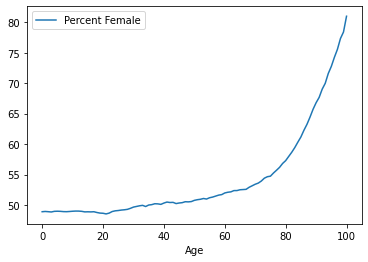

In [67]:
pop_2014.plot('Age', 'Percent Female')

In [25]:
# Calculate the females:male ratio for each age and add as a new column
female_male_ratio = pop_2014['Females']/pop_2014['Males']
pop_2014['Female:Male Ratio']= female_male_ratio
pop_2014

,Age,Males,Females,Percent Female,Female:Male Ratio
0,0,2017857,1930493,48.893664,0.956705
1,1,2023253,1938870,48.935129,0.958293
2,2,2022502,1935270,48.897966,0.956869
3,3,2048618,1956572,48.850916,0.955069
4,4,2043498,1959950,48.956549,0.959115
...,...,...,...,...,...
96,96,31235,89949,74.225145,2.879750
97,97,20479,63252,75.541914,3.088627
98,98,13649,46536,77.321592,3.409481
99,99,9037,32791,78.394855,3.628527


In [26]:
pop_2014.head(20)

,Age,Males,Females,Percent Female,Female:Male Ratio
0,0,2017857,1930493,48.893664,0.956705
1,1,2023253,1938870,48.935129,0.958293
2,2,2022502,1935270,48.897966,0.956869
3,3,2048618,1956572,48.850916,0.955069
4,4,2043498,1959950,48.956549,0.959115
5,5,2043467,1961391,48.975295,0.959835
6,6,2110328,2024024,48.956257,0.959104
7,7,2122240,2031760,48.910929,0.957366
8,8,2105122,2014402,48.898902,0.956905
9,9,2097272,2009560,48.932121,0.958178


## Visualization: Line Graph

<AxesSubplot:xlabel='Age'>

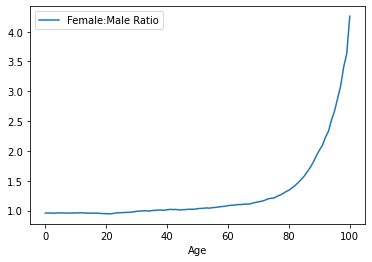

In [27]:
pop_2014.plot('Age', 'Female:Male Ratio')

In [28]:
pop_2014

,Age,Males,Females,Percent Female,Female:Male Ratio
0,0,2017857,1930493,48.893664,0.956705
1,1,2023253,1938870,48.935129,0.958293
2,2,2022502,1935270,48.897966,0.956869
3,3,2048618,1956572,48.850916,0.955069
4,4,2043498,1959950,48.956549,0.959115
...,...,...,...,...,...
96,96,31235,89949,74.225145,2.879750
97,97,20479,63252,75.541914,3.088627
98,98,13649,46536,77.321592,3.409481
99,99,9037,32791,78.394855,3.628527


<AxesSubplot:xlabel='Age'>

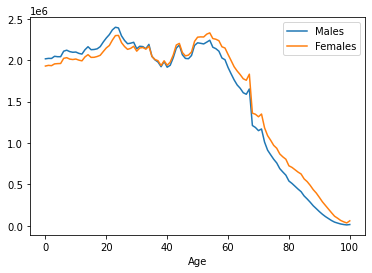

In [29]:
pop_2014.plot('Age', ['Males', 'Females'])

In [31]:
pop_2014[(pop_2014['Age'] >= 65) & (pop_2014['Age'] <= 75)]

,Age,Males,Females,Percent Female,Female:Male Ratio
65,65,1607688,1776761,52.497792,1.105165
66,66,1589127,1758649,52.531860,1.106676
67,67,1653257,1832245,52.567607,1.108264
68,68,1211480,1361047,52.907005,1.123458
69,69,1187554,1347458,53.153910,1.134650
70,70,1149247,1317238,53.405474,1.146175
71,71,1169356,1350392,53.592343,1.154817
72,72,1010896,1183338,53.929435,1.170583
73,73,913008,1089183,54.399555,1.192961
74,74,857432,1032934,54.642011,1.204683


In [32]:
2014 - np.arange(67, 73)

array([1947, 1946, 1945, 1944, 1943, 1942])

In [33]:
everyone

,AGE,2010,2014
0,0,3951330,3948350
1,1,3957888,3962123
2,2,4090862,3957772
3,3,4111920,4005190
4,4,4077552,4003448
...,...,...,...
96,96,97161,121184
97,97,68893,83731
98,98,47037,60185
99,99,32178,41828


In [34]:
pop_change=everyone.assign(Population_Change=everyone['2014'] - everyone['2010'])
pop_change

,AGE,2010,2014,Population_Change
0,0,3951330,3948350,-2980
1,1,3957888,3962123,4235
2,2,4090862,3957772,-133090
3,3,4111920,4005190,-106730
4,4,4077552,4003448,-74104
...,...,...,...,...
96,96,97161,121184,24023
97,97,68893,83731,14838
98,98,47037,60185,13148
99,99,32178,41828,9650


In [35]:
pop_change.sort_values(by='Population_Change', ascending=False)

,AGE,2010,2014,Population_Change
67,67,2693709,3485502,791793
64,64,2706063,3488136,782073
66,66,2621346,3347776,726430
65,65,2678532,3384449,705917
71,71,1953614,2519748,566134
...,...,...,...,...
39,39,4324460,3979827,-344633
48,48,4534669,4158996,-375673
47,47,4535464,4082150,-453314
46,46,4529712,4076237,-453475


In [36]:
everyone.assign(Percent_Change= (everyone['2014']/everyone['2010']) - 1).sort_values(by='Percent_Change', ascending=False)

,AGE,2010,2014,Percent_Change
100,100,54409,72197,0.326931
93,93,219063,286333,0.307081
99,99,32178,41828,0.299894
67,67,2693709,3485502,0.293942
71,71,1953614,2519748,0.289788
...,...,...,...,...
39,39,4324460,3979827,-0.079694
48,48,4534669,4158996,-0.082845
47,47,4535464,4082150,-0.099949
46,46,4529712,4076237,-0.100111
